In [1]:
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
import random
import os

from keras.utils.np_utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
scaler = MinMaxScaler()
TRAIN_DATASET_PATH = '/gdrive/My Drive/PJ_BrainTumor_Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
# test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
# print(test_image_flair.max())


In [ ]:
folders = os.listdir(TRAIN_DATASET_PATH)
folders.sort()

files = os.listdir(TRAIN_DATASET_PATH + folders[0])

#folders

# files.sort()

files


for i in range(25):
  files = os.listdir(TRAIN_DATASET_PATH + folders[i])
  files.sort()
  os.rename(TRAIN_DATASET_PATH + folders[i] + '/' +files[0], TRAIN_DATASET_PATH + folders[i] + '/' +'test_img_' + str((i)) + '_flair.nii')
  os.rename(TRAIN_DATASET_PATH + folders[i] + '/' +files[1], TRAIN_DATASET_PATH + folders[i] + '/' +'test_img_' + str((i)) + '_seg.nii')
  os.rename(TRAIN_DATASET_PATH + folders[i] + '/' +files[2], TRAIN_DATASET_PATH + folders[i] + '/' +'test_img_' + str((i)) + '_t1.nii')
  os.rename(TRAIN_DATASET_PATH + folders[i] + '/' +files[3], TRAIN_DATASET_PATH + folders[i] + '/' +'test_img_' + str((i)) + '_t1ce.nii')
  os.rename(TRAIN_DATASET_PATH + folders[i] + '/' +files[4], TRAIN_DATASET_PATH + folders[i] + '/' +'test_img_' + str((i)) + '_t2.nii')

  os.rename(TRAIN_DATASET_PATH + folders[i], TRAIN_DATASET_PATH + 'case_' + str((i)))


# # os.rename(TRAIN_DATASET_PATH + 'ABC', TRAIN_DATASET_PATH + 'abc')



[0 1 2 4]
[0 1 2 3]


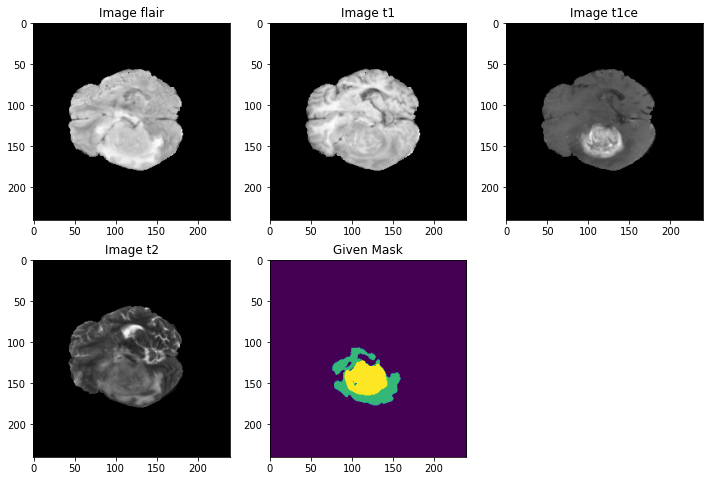

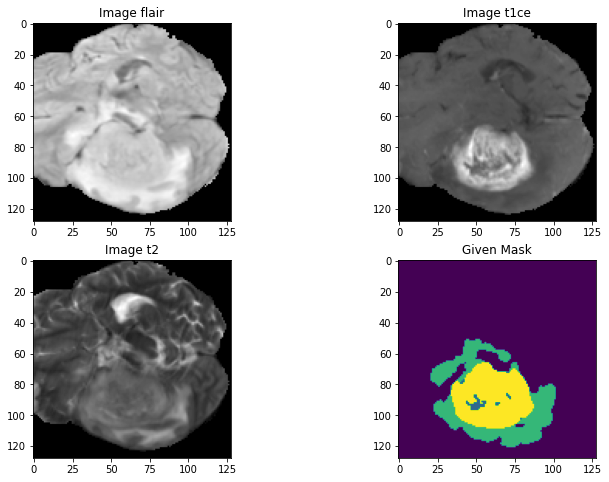

In [14]:

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_150/BraTS20_Training_150_flair.nii').get_fdata()
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_150/BraTS20_Training_150_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_150/BraTS20_Training_150_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_150/BraTS20_Training_150_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_150/BraTS20_Training_150_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

n_slice=70

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Given Mask')
plt.show()

combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

#Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
#cropping x, y, and z
#combined_x=combined_x[24:216, 24:216, 13:141]

combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4

#Do the same for mask
test_mask = test_mask[56:184, 56:184, 13:141]

n_slice=55
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Given Mask')
plt.show()


In [ ]:
from skimage.io import imread
TEST_SAVE = '/gdrive/My Drive/Brats 2018/MICCAI_BraTS_2018_Data_Training/'
# imsave(TEST_SAVE + 'combined255.tif', combined_x)
# np.save(TEST_SAVE + 'combined255.npy', combined_x)
#Verify image is being read properly
# my_img=imread(TEST_SAVE+'combined255.tif')

# my_img=np.load(TEST_SAVE +'combined255.npy')

# test_mask = to_categorical(test_mask, num_classes=4)
#t1_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))
t2_list = sorted(glob.glob(TEST_SAVE+'LGG/*/*t2.nii'))
t1ce_list = sorted(glob.glob(TEST_SAVE+'LGG/*/*t1ce.nii'))
flair_list = sorted(glob.glob(TEST_SAVE+'LGG/*/*flair.nii'))
mask_list = sorted(glob.glob(TEST_SAVE+'LGG/*/*seg.nii'))


In [ ]:
len(t2_list)

75

In [ ]:
#Each volume generates 18 64x64x64x4 sub-volumes. 
#Total 369 volumes = 6642 sub volumes
for img in range(25):   #Using t1_list as all lists are of same size
    if img != 1:
      print("Now preparing image and masks number: ", img+1)
        
      temp_image_t2=nib.load(t2_list[img]).get_fdata()
      temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
    
      temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
      temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
    
      temp_image_flair=nib.load(flair_list[img]).get_fdata()
      temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
          
      temp_mask=nib.load(mask_list[img]).get_fdata()
      temp_mask=temp_mask.astype(np.uint8)
      temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
      #print(np.unique(temp_mask))
      
      
      temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
      
      #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
      #cropping x, y, and z
      temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
      temp_mask = temp_mask[56:184, 56:184, 13:141]
      
      val, counts = np.unique(temp_mask, return_counts=True)
      
      if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
          print("Useful volume")
          temp_mask= to_categorical(temp_mask, num_classes=4)
          np.save('/gdrive/My Drive/Brats 2018/LGG_prsd_images/input_data_3channels/images/image_'+str(img+26)+'.npy', temp_combined_images)
          np.save('/gdrive/My Drive/Brats 2018/LGG_prsd_images/input_data_3channels/masks/mask_'+str(img+26)+'.npy', temp_mask)
          
      else:
          print("discarding volume") 

Now preparing image and masks number:  1
Useful volume
Now preparing image and masks number:  3
Useful volume
Now preparing image and masks number:  4
Useful volume
Now preparing image and masks number:  5
Useful volume
Now preparing image and masks number:  6
Useful volume
Now preparing image and masks number:  7
Useful volume
Now preparing image and masks number:  8
Useful volume
Now preparing image and masks number:  9
Useful volume
Now preparing image and masks number:  10
Useful volume
Now preparing image and masks number:  11
Useful volume
Now preparing image and masks number:  12
Useful volume
Now preparing image and masks number:  13
Useful volume
Now preparing image and masks number:  14
discarding volume
Now preparing image and masks number:  15
Useful volume
Now preparing image and masks number:  16
Useful volume
Now preparing image and masks number:  17
Useful volume
Now preparing image and masks number:  18
Useful volume
Now preparing image and masks number:  19
Useful vol

In [ ]:
pip install split-folders

In [ ]:
import splitfolders  # or import split_folders

input_folder = TEST_SAVE + 'input_data_3channels/'
output_folder = TEST_SAVE + 'input_data_128/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=100, ratio=(0.75, 0.25), group_prefix=None) # default values

In [ ]:
TEST_SAVE

'/gdrive/My Drive/PJ_BrainTumor_Dataset/BraTS2020_TrainingData/'